In [1]:
from __future__ import print_function, division
from builtins import range



import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD

In [5]:
# from nltk.corpus import stopwords
# stopwords.words('english')

In [2]:
wordnet_lemmatizer = WordNetLemmatizer()

In [4]:
titles = [line.rstrip() for line in open('./all_book_titles.txt')]

In [7]:
# 和情緒分析用一樣的stopwords
stopwords = set(w.rstrip() for w in open('./stopwords.txt'))

In [8]:
def my_tokenizer(s):
    s = s.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(s) # 字串變單字 (tokens)
    tokens = [t for t in tokens if len(t) > 2] # 移除短字
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # 只取英文基本型
    tokens = [t for t in tokens if t not in stopwords] # 移除 stopwords
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # 移除數字，比方 "3rd edition"
    return tokens

In [9]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\03950\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\03950\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# 先產生 word-to-index map 再產生 word-frequency vectors
# 同時儲存 tokenized 版本未來不需再做 tokenization
word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = []
error_count = 0
for title in titles:
    try:
        title = title.encode('ascii', 'ignore').decode('utf-8') # this will throw exception if bad characters
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1
                index_word_map.append(token)
    except Exception as e:
        print(e)
        print(title)
        error_count += 1

In [11]:
print("Number of errors parsing file:", error_count, "number of lines in file:", len(titles))
if error_count == len(titles):
    print("There is no data to do anything with! Quitting...")
    exit()

Number of errors parsing file: 0 number of lines in file: 2373


In [14]:
# 產生輸入矩陣 - 是否出現(indicator)較比例(proportions)更準
def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] = 1
    return x

N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D, N)) # 字彙是列, 文件是行
i = 0
for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens)
    i += 1


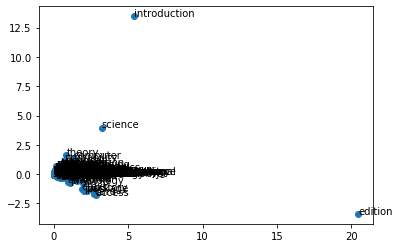

In [16]:
def main():
    svd = TruncatedSVD()
    Z = svd.fit_transform(X)
    plt.scatter(Z[:,0], Z[:,1])
    for i in range(D):
        plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))
    plt.show()

if __name__ == '__main__':
    main()